Performance plots using yfinance package for Yahoo prices

In [1]:
# qis analytics
from qis.examples.core.price_plots import generate_performances
from qis import TimePeriod, PerfParams, PerfStat
import yfinance as yf

In [2]:
# define tickers and time period
regime_benchmark = 'SPY'
tickers = [regime_benchmark, 'QQQ', 'EEM', 'TLT', 'IEF', 'LQD', 'HYG', 'SHY', 'GLD']


In [3]:
prices = yf.download(tickers, start=None, end=None)['Close'][tickers].dropna()
ust_3m_rate = yf.download('^IRX', start=None, end=None)['Close'].dropna() / 100.0

[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
# define time period for analysis and performance cals
time_period = TimePeriod('16Oct2014', None)
perf_params = PerfParams(freq='W-WED', freq_reg='W-WED', freq_drawdown='B', rates_data=ust_3m_rate, alpha_an_factor=52)
kwargs = dict(x_date_freq='QE', heatmap_freq='YE', date_format='%b-%y', perf_params=perf_params,
             perf_columns = [PerfStat.START_DATE,
                                PerfStat.END_DATE,
                                PerfStat.TOTAL_RETURN,
                                PerfStat.PA_RETURN,
                                PerfStat.VOL,
                                PerfStat.SHARPE_RF0,
                                PerfStat.SHARPE_EXCESS,
                                PerfStat.MAX_DD,
                                # PerfStat.MAX_DD_VOL,
                                PerfStat.SKEWNESS,
                                PerfStat.ALPHA,
                                PerfStat.BETA,
                                PerfStat.R2]
             )

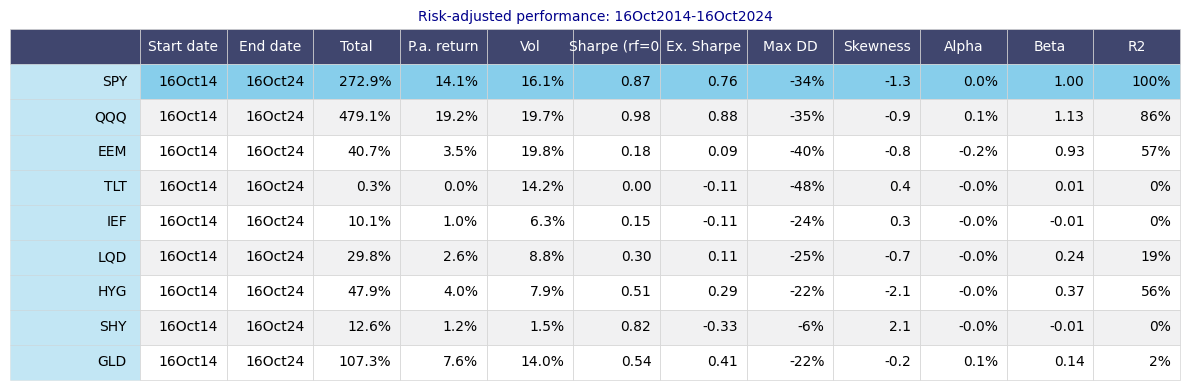

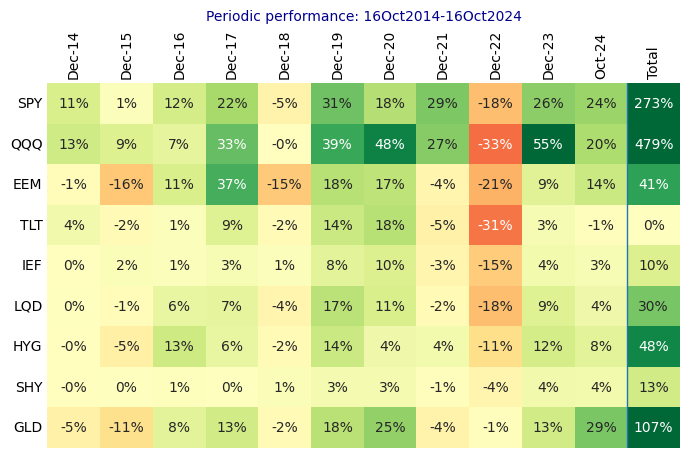

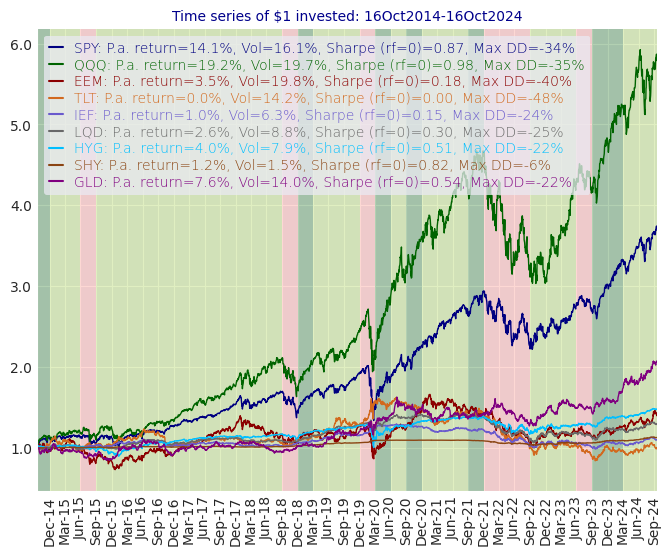

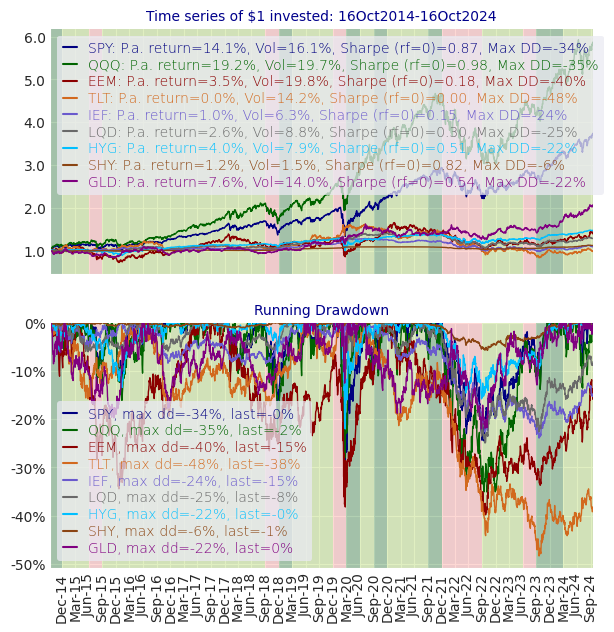

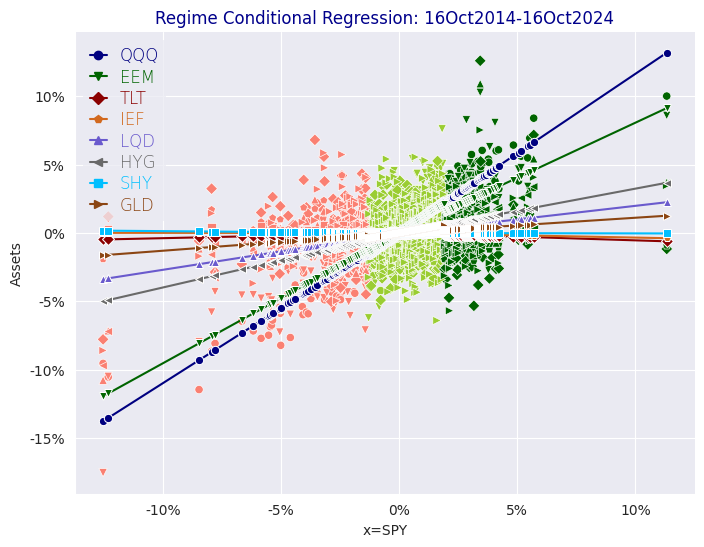

In [10]:
# plot performances
generate_performances(prices=time_period.locate(prices),
                     regime_benchmark=regime_benchmark,
                     **kwargs)